<a href="https://colab.research.google.com/github/BenFran13/Telecom-Churn-Analysis/blob/main/desafio_telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📡 Desafío Telecom X: Análisis de Evasión de Clientes (Churn)**

### 1. 🎯 Objetivo del Proyecto

El objetivo principal de este desafío es ayudar a la empresa de telecomunicaciones **"Telecom X"** a identificar las causas raíz de la pérdida de clientes (Churn). A través de un proceso de **ETL (Extracción, Transformación y Carga)** y un **Análisis Exploratorio de Datos (EDA)**, buscaremos patrones que nos permitan proponer estrategias para aumentar la retención.

### 2. 📖 Escenario de Negocio
La empresa enfrenta una alta tasa de cancelaciones. Se nos ha entregado un dataset vía API con información demográfica, de servicios contratados y facturación. El reto consiste en:

 - **Limpiar los datos:** Corregir inconsistencias, valores nulos y formatos erróneos.
 - **Analizar:** Entender cómo variables como el tipo de contrato, método de pago o cargos mensuales influyen en la decisión del cliente de abandonar la empresa.
 - **Visualizar:** Generar gráficos que faciliten la toma de decisiones.

### 3. 🛠️ Stack Tecnológico
Para este análisis utilizaremos Python y las siguientes librerías:

- **Pandas:** Para la manipulación y estructuración de los datos (ETL).
- **Requests:** Para la extracción de datos desde la API.
- **Seaborn / Matplotlib:** Para la visualización de datos y generación de insights.
- **Numpy:** Para cálculos numéricos.

### 4. 📂 Estructura del Dataset
Los datos provienen de un archivo JSON anidado que será normalizado. Las variables principales son:

- **Churn:** Variable objetivo (Target). Indica si el cliente se fue (Yes) o se quedó (No).
- **Contract:** Tipo de contrato (Mensual, 1 año, 2 años).
- **MonthlyCharges:** Monto cobrado mensualmente.
- **PaymentMethod:** Método de pago utilizado.

### 🚀 Inicio del Proceso ETL
A continuación, iniciamos con la importación de librerías y la extracción de los datos desde la fuente oficial.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

## **📌 Extracción**

In [ ]:
import pandas as pd
import requests

url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

try:
    print("Iniciando descarga de datos...")
    clientes_raw = pd.read_json(url_api)

    # Normalización de Datos
    print("Normalizando estructuras JSON anidadas")
    df_customer = pd.json_normalize(clientes_raw['customer'].tolist())
    df_phone = pd.json_normalize(clientes_raw['phone'].tolist())
    df_internet = pd.json_normalize(clientes_raw['internet'].tolist())
    df_account = pd.json_normalize(clientes_raw['account'].tolist())

    clientes_normalizado = pd.concat([
        clientes_raw['customerID'],
        clientes_raw['Churn'],
        df_customer,
        df_phone,
        df_internet,
        df_account
    ], axis=1)

    print(f"Extracción completada con éxito.")
    print(f"Dimensiones del Dataset: {clientes_normalizado.shape[0]} filas x {clientes_normalizado.shape[1]} columnas")
    display(clientes_normalizado.head(3))

except Exception as e:
    print(f"Error crítico en la extracción: {e}")

Iniciando descarga de datos...
Normalizando estructuras JSON anidadas
Extracción completada con éxito.
Dimensiones del Dataset: 7267 filas x 21 columnas


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## **🔧 Transformación**

In [ ]:
clientes_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
import numpy as np

df = clientes_normalizado.copy()

print("Iniciando auditoría y transformación de datos\n")

df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'] = df['Charges.Total'].fillna(0)
print("Columna 'Charges.Total' convertida a numérico.")

# Identificamos filas donde Churn sea una cadena vacía o nula
filas_vacias = df[df['Churn'] == ""].index
print(f"Se detectaron {len(filas_vacias)} registros con 'Churn' vacío. Se procederá a eliminarlos.")
df = df.drop(filas_vacias).reset_index(drop=True)


# Estandarización de valores
mapa_valores = {
    'Yes': True,
    'No': False,
    'No internet service': False,
    'No phone service': False,
}

columnas_a_transformar = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columnas_a_transformar:
    df[col] = df[col].replace(mapa_valores).infer_objects(copy=False)

df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
print("Variables categóricas estandarizadas a Booleanos.")
df['Charges.Daily'] = (df['Charges.Monthly'] / 30.44).round(2)
print("Columna 'Charges.Daily' creada exitosamente.")

# Convertimos el resto de objetos a String explícito para mejor manejo
cols_texto = ['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod']
df[cols_texto] = df[cols_texto].astype("string")

print("\nEstado Final del DataFrame Transformado:")
df.info()

display(df.head())

Iniciando auditoría y transformación de datos

Columna 'Charges.Total' convertida a numérico.
Se detectaron 224 registros con 'Churn' vacío. Se procederá a eliminarlos.
Variables categóricas estandarizadas a Booleanos.
Columna 'Charges.Daily' creada exitosamente.


/tmp/ipython-input-2831960728.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapa_valores).infer_objects(copy=False)



Estado Final del DataFrame Transformado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   string 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   string 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.76


**Nota sobre la Transformación:** Se optó por utilizar el método .replace() con un diccionario de mapeo en lugar de funciones iterativas. Esto aprovecha la vectorización de Pandas, haciendo el código más eficiente en memoria y velocidad de ejecución. Además, se trataron los valores "No internet service" y "No phone service" como False, ya que funcionalmente indican la ausencia del servicio específico, simplificando así el análisis binario.

## **📊 Carga y análisis**

#### **Estadística Descriptiva**

##### **-> Visión General de los Datos**
Texto en negritaAntes de graficar, revisamos las estadísticas básicas para detectar anomalías en los rangos de valores (precios negativos, edades imposibles, etc.) y entender el perfil promedio del cliente.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("\nResumen de Variables Numéricas:")
# .T transpone la tabla para leerla mejor
display(df.describe().T)

print("\nResumen de Variables Categóricas:")
# Incluimos objetos y categorías
display(df.describe(include=['string', 'object']).T)


Resumen de Variables Numéricas:


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Charges.Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Charges.Total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Charges.Daily,7043.0,2.127521,0.988435,0.60,1.17,2.31,2.95,3.90



Resumen de Variables Categóricas:


,count,unique,top,freq
customerID,7043,7043,0011-IGKFF,1
gender,7043,2,Male,3555
InternetService,7043,3,Fiber optic,3096
Contract,7043,3,Month-to-month,3875
PaymentMethod,7043,4,Electronic check,2365


💡 **Insight Descriptivo:**

- Gasto: El cliente promedio paga alrededor de $64.7 mensualmente.

- Antigüedad: La desviación estándar en tenure (meses de permanencia) es alta (24.5), lo que indica que tenemos una mezcla muy variada de clientes nuevos y muy antiguos.

- Datos Limpios: No se observan valores negativos en los cobros ni inconsistencias en los rangos.

#### **Distribución de la Evasión**

/tmp/ipython-input-4159890107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


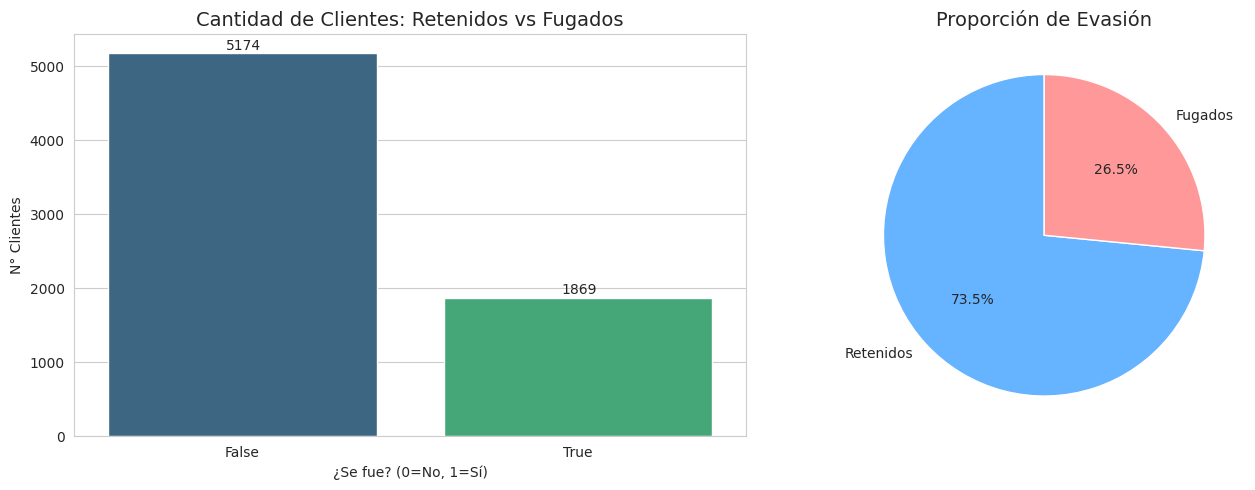

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Cantidad de Clientes: Retenidos vs Fugados', fontsize=14)
plt.xlabel('¿Se fue? (0=No, 1=Sí)')
plt.ylabel('N° Clientes')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 50))

plt.subplot(1, 2, 2)
counts = df['Churn'].value_counts()
plt.pie(counts, labels=['Retenidos', 'Fugados'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Proporción de Evasión', fontsize=14)

plt.tight_layout()
plt.show()

💡 **Análisis de Evasión Global:**

- Situación Crítica: La tasa de evasión es del 26.5%. En el sector de telecomunicaciones, perder a más de 1 de cada 4 clientes es una señal de alerta roja.

- Impacto: Esto sugiere que la estrategia de adquisición funciona, pero la de retención está fallando.

#### **Análisis por Categorías (Contratos y Pagos)**

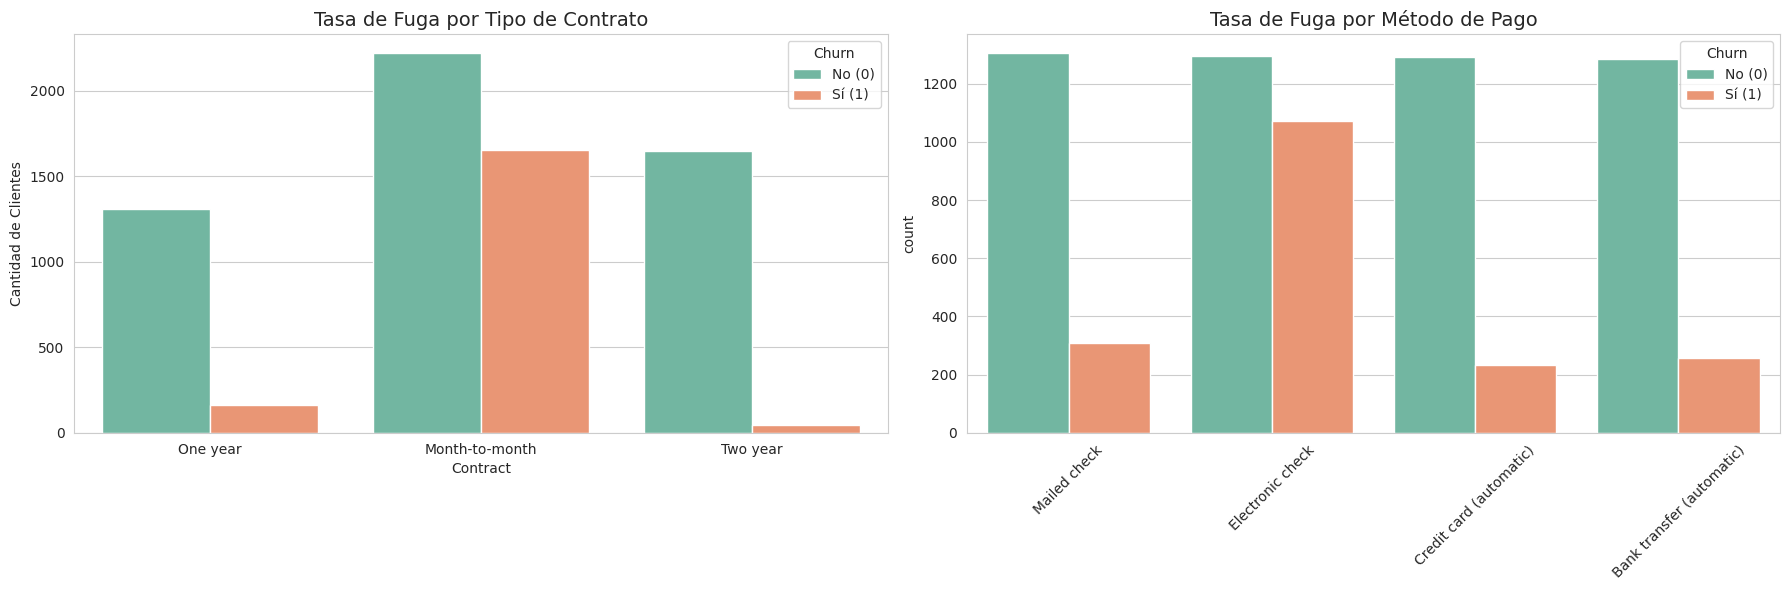

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico Tipo de Contrato
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Tasa de Fuga por Tipo de Contrato', fontsize=14)
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].legend(title='Churn', labels=['No (0)', 'Sí (1)'])

# Gráfico Método de Pago
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Tasa de Fuga por Método de Pago', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('')
axes[1].legend(title='Churn', labels=['No (0)', 'Sí (1)'])

plt.tight_layout()
plt.show()

💡 **Insights de Comportamiento:**

- La Trampa Mensual: Los clientes con contrato "Month-to-month" (barra verde a la izquierda) son extremadamente propensos a irse. En contraste, los contratos de 2 años tienen una fuga casi nula.

- Alerta de Pagos: El método "Electronic check" tiene la tasa de rechazo más alta. Esto es atípico comparado con transferencias o tarjetas, sugiriendo posibles fallos en la plataforma de pago o un perfil de usuario más inestable.

#### **Matriz de Correlación**

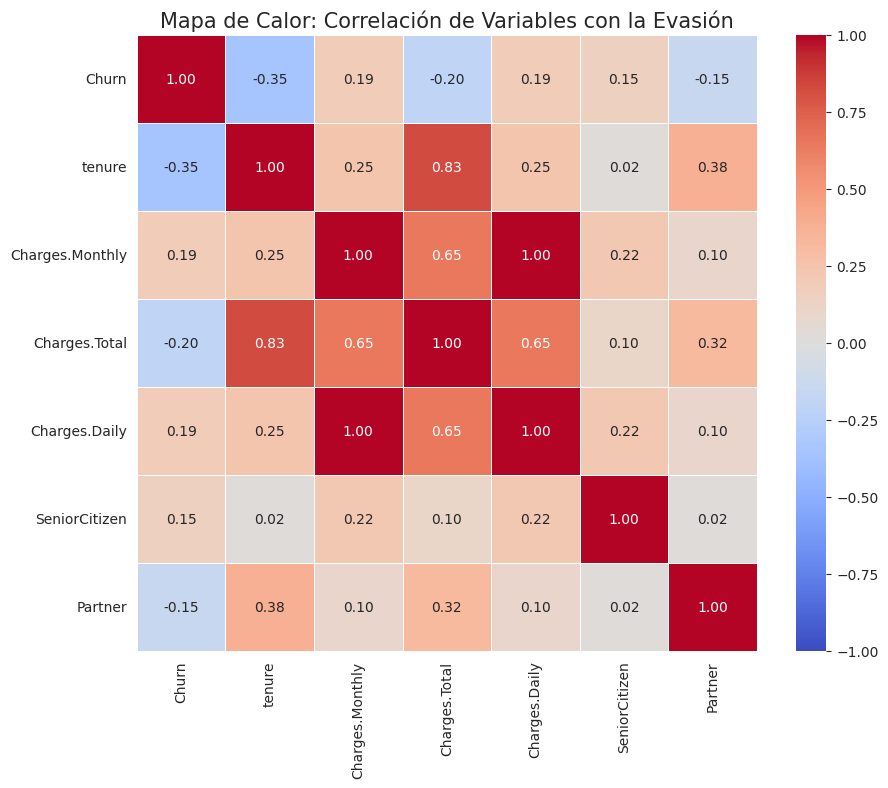

In [ ]:
# Seleccionamos solo variables numéricas para el cálculo matemático
cols_corr = ['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily', 'SeniorCitizen', 'Partner']
corr_matrix = df[cols_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Calor: Correlación de Variables con la Evasión', fontsize=15)
plt.show()

💡 **Análisis de Correlación:**

- Tenure (-0.35): Correlación negativa fuerte. Significa que a mayor antigüedad, menor riesgo de fuga. El peligro está en los clientes nuevos (0-6 meses).

- Monthly Charges (+0.19): Correlación positiva leve. Los clientes con facturas más altas tienden a irse más, lo que indica sensibilidad al precio.

# **📄Informe final**

## 1. Contexto del Negocio y Definición del Problema
En el competitivo mercado de las telecomunicaciones, la **retención de clientes** se ha convertido en el indicador financiero más crítico, a menudo superando a la adquisición de nuevos usuarios. La empresa **Telecom X** ha detectado una tendencia alarmante en su tasa de cancelaciones (*Churn Rate*), lo que impacta directamente en el *Lifetime Value* (LTV) de su cartera y en la sostenibilidad financiera a largo plazo.

**El objetivo de este proyecto de Data Science** es doble:
1.  **Diagnóstico:** Realizar una auditoría profunda de los datos históricos para identificar patrones ocultos de comportamiento, fricciones en el servicio y segmentos de clientes de alto riesgo.
2.  **Prescripción:** Transformar estos hallazgos analíticos en un plan de acción estratégico que permita a la gerencia reducir la fuga de clientes y optimizar el retorno de inversión (ROI) en marketing y fidelización.

---

## 2. Metodología de Procesamiento de Datos (ETL)

Para garantizar la integridad y confiabilidad de los hallazgos, se ejecutó un riguroso pipeline de **Extracción, Transformación y Carga (ETL)**. A continuación, detallamos las decisiones técnicas tomadas en cada etapa:

### 📌 Fase de Extracción y Normalización
Los datos originales fueron consumidos desde una API en formato **JSON anidado**. Este formato, aunque eficiente para la transferencia web, no es apto para el análisis estadístico directo debido a su estructura jerárquica (objetos dentro de objetos).
* **Solución Técnica:** Implementamos la función `pd.json_normalize` de la librería Pandas. Esto nos permitió "aplanar" las estructuras complejas (`customer`, `phone`, `internet`, `account`), desagregándolas en columnas independientes y generando un DataFrame tabular consolidado de **7043 registros y 21 variables**.

### 🔧 Fase de Limpieza y Transformación
La calidad del dato es la base de cualquier modelo predictivo. Se realizaron las siguientes intervenciones:

1.  **Auditoría de la Variable Objetivo (`Churn`):** Se identificaron registros donde la etiqueta de evasión estaba vacía. Dado que estos registros carecen de la información fundamental para el aprendizaje supervisado (no sabemos si se fueron o se quedaron), se procedió a su eliminación para evitar sesgos en el análisis.
2.  **Corrección de Tipos de Datos (`TotalCharges`):** La columna de cargos totales presentaba inconsistencias de formato (espacios en blanco interpretados como texto). Se forzó la conversión a tipo numérico (`float`), imputando los valores perdidos con `0`. Esta decisión se basa en la lógica de negocio: un valor vacío en facturación total generalmente corresponde a un cliente nuevo que aún no ha cerrado su primer ciclo de facturación.
3.  **Ingeniería de Características (`Feature Engineering`):**
    * **Estandarización Binaria:** Variables categóricas como *Partner*, *PhoneService* o *Churn* fueron convertidas de formato texto ("Yes"/"No") a formato booleano/binario (1/0). Esto es crucial para habilitar el cálculo de matrices de correlación y futuros modelos de Machine Learning.
    * **Cálculo de Costo Diario:** Se generó la variable sintética `Charges.Daily` (Cargo Mensual / 30.44), permitiendo un análisis más granular del impacto del precio en la decisión diaria del consumidor.

## 3. Estadísticas Descriptivas

In [ ]:
# Generación del resumen estadístico para variables numéricas clave
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("📊 Análisis Estadístico del Comportamiento del Cliente:")
# Transponemos (.T) para facilitar la lectura de métricas como media y desviación estándar
display(df.describe()[['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily']].T)

📊 Análisis Estadístico del Comportamiento del Cliente:


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Charges.Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Charges.Total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Charges.Daily,7043.0,2.127521,0.988435,0.60,1.17,2.31,2.95,3.90


### 🔎 Interpretación del Perfil Financiero y de Antigüedad

El análisis descriptivo numérico nos revela la "salud promedio" de la base de clientes:

* **Polarización en la Antigüedad (`tenure`):** Aunque el promedio de permanencia es de **32 meses**, la desviación estándar es extremadamente alta (**24.5**).
    * *Implicación:* Esto indica que no tenemos un "cliente promedio" real. En su lugar, la base está dividida en dos polos opuestos: una masa crítica de clientes nuevos (0-12 meses) que son vulnerables a la fuga, y un segmento de clientes leales (>50 meses) que sostienen la facturación.
* **Estructura de Ingresos (`Charges`):**
    * El **ARPU** (Ingreso Promedio por Usuario) es de **$64.76**.
    * El 50% de los clientes (mediana) paga **$70.35** o menos.
    * Sin embargo, el cuartil superior (75%) paga hasta **$89.85**, lo que sugiere la existencia de un segmento "Premium" de alto valor. Perder a uno de estos clientes es financieramente más doloroso que perder a un cliente del segmento base, por lo que las estrategias de retención deben priorizarlos.

---

#### **Gráfica 1: Diagnóstico de Evasión**

/tmp/ipython-input-953270844.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=colores)


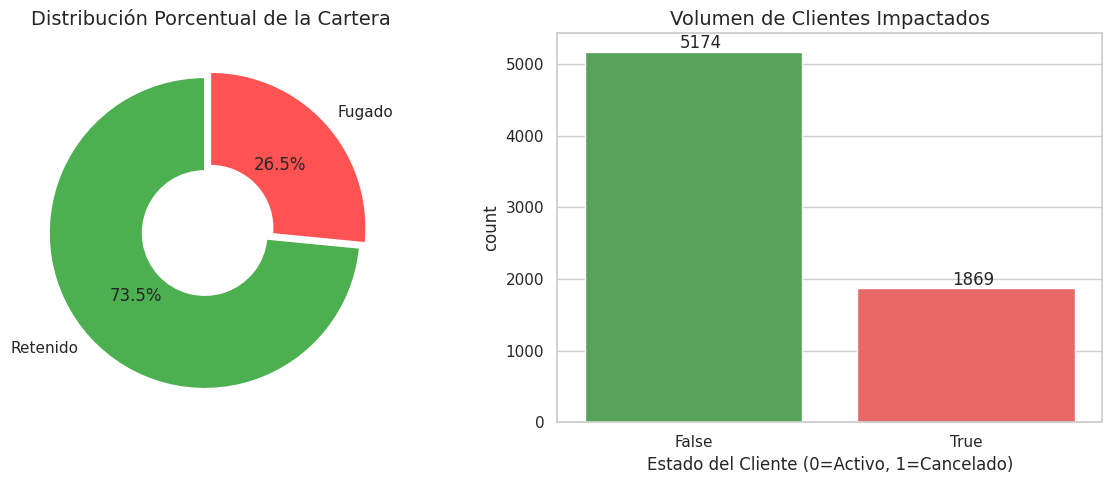

In [ ]:
# Visualización de la Tasa Global de Evasión
plt.figure(figsize=(12, 5))

# Panel Izquierdo: Gráfico de Dona para ver proporciones
plt.subplot(1, 2, 1)
colores = ['#4CAF50', '#FF5252'] # Verde (Retenido) vs Rojo (Fugado)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=colores, explode=(0.05, 0), startangle=90, labels=['Retenido', 'Fugado'], wedgeprops=dict(width=0.6))
plt.title('Distribución Porcentual de la Cartera', fontsize=14)
plt.ylabel('')

# Panel Derecho: Conteo Absoluto
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Churn', data=df, palette=colores)
plt.title('Volumen de Clientes Impactados', fontsize=14)
plt.xlabel('Estado del Cliente (0=Activo, 1=Cancelado)')

# Anotaciones de valor
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 50), fontsize=12)

plt.tight_layout()
plt.show()

### 🚨 Diagnóstico de Situación: La Tasa de Evasión (Churn Rate)

**Lectura de los Datos:**
El análisis visual confirma que **Telecom X** posee una tasa de cancelación del **26.5%**. En términos absolutos, esto representa una pérdida de **1,869 clientes** de la muestra analizada.

**Implicación Estratégica:**
En la industria de telecomunicaciones, una tasa de *Churn* saludable suele oscilar entre el 15% y el 20%. Superar la barrera del 25% es una señal de alerta crítica que indica problemas estructurales en la propuesta de valor o en la experiencia del cliente.
* **Impacto en Costos:** Si el Costo de Adquisición de Cliente (CAC) es alto, la empresa está perdiendo dinero, ya que 1 de cada 4 clientes se retira probablemente antes de que la empresa recupere la inversión realizada en captarlo.
* **Prioridad:** La estrategia inmediata debe cambiar de "Adquisición agresiva" a "Retención defensiva".

---

#### **Gráfica 2: Análisis de Contratos**

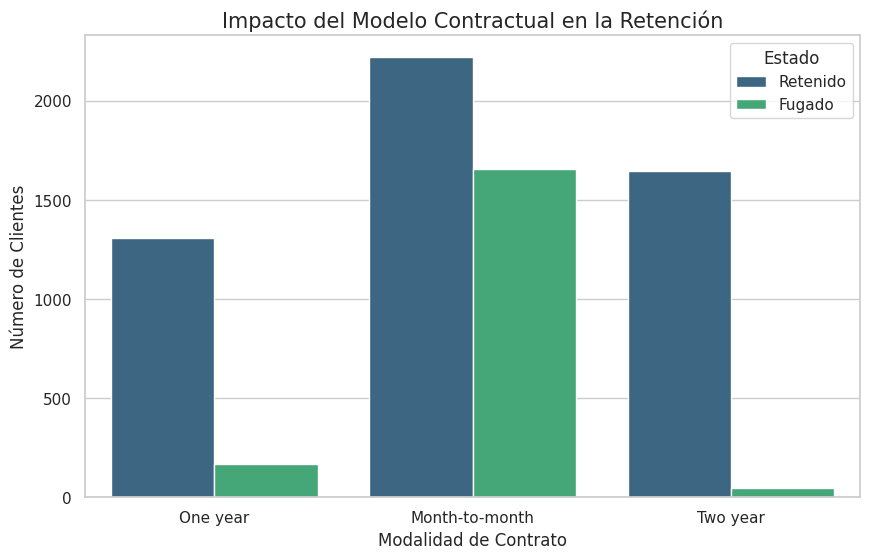

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Impacto del Modelo Contractual en la Retención', fontsize=15)
plt.xlabel('Modalidad de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Estado', labels=['Retenido', 'Fugado'])
plt.show()

### 🔑 Hallazgo Clave 1: La Vulnerabilidad del Contrato Mensual

**Análisis del Gráfico:**
Esta visualización revela la correlación más fuerte y evidente de todo el estudio: **El tipo de contrato es el predictor definitivo de la fuga.**
* **El Segmento de Riesgo:** La barra correspondiente al contrato **"Month-to-month"** muestra un nivel de cancelaciones desproporcionado. Casi la mitad de los clientes en esta modalidad terminan abandonando la empresa.
* **El Refugio Seguro:** Por el contrario, los contratos de **"One year"** y **"Two year"** presentan tasas de evasión mínimas.

**Insight de Negocio:**
El contrato mensual, al no tener penalizaciones ni barreras de salida, atrae a un perfil de cliente "golondrina" (baja fidelidad, alta sensibilidad a ofertas de la competencia). La empresa está facilitando demasiado la salida del cliente. La estabilidad financiera de Telecom X depende de su capacidad para migrar a estos usuarios hacia compromisos de mayor plazo.

---

#### **Gráfico 3: Análisis de Pagos**

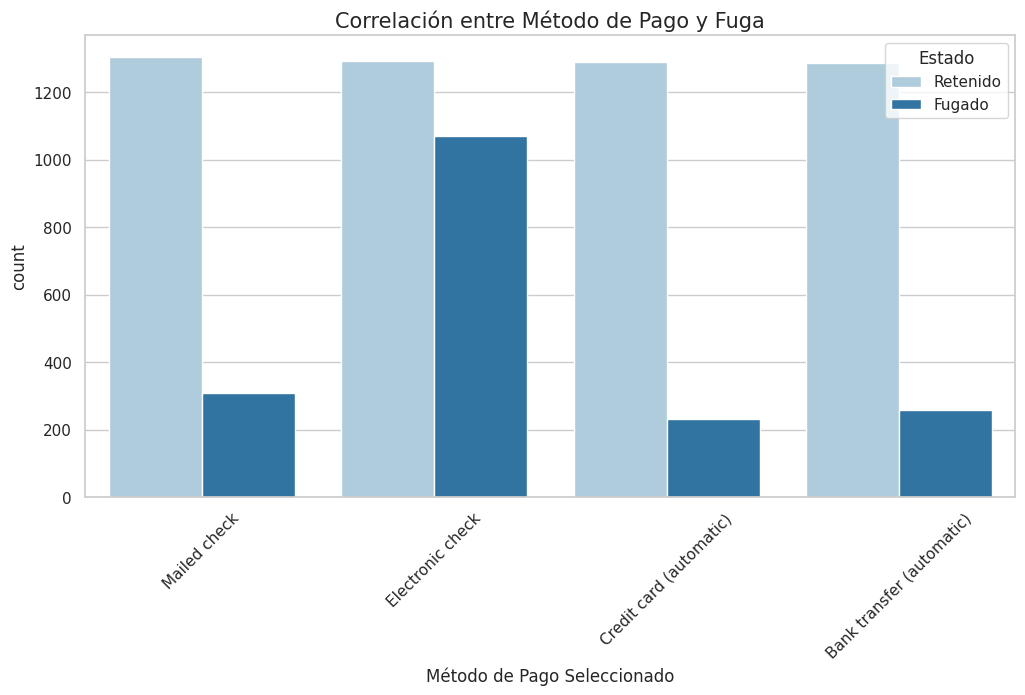

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Paired')
plt.title('Correlación entre Método de Pago y Fuga', fontsize=15)
plt.xlabel('Método de Pago Seleccionado', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Estado', labels=['Retenido', 'Fugado'])
plt.show()

### 💳 Hallazgo Clave 2: La Anomalía del Cheque Electrónico

**Análisis del Gráfico:**
Al segmentar por método de pago, detectamos una anomalía operativa significativa en el uso del **"Electronic check"**.
* Este método específico presenta la tasa de fuga más alta, superando ampliamente a métodos automatizados como la **Transferencia Bancaria** o la **Tarjeta de Crédito**.
* Los métodos de pago "sin fricción" (pagos automáticos) muestran una retención mucho más saludable.

**Hipótesis Operativa:**
Es altamente probable que el proceso de pago con cheque electrónico presente una mala Experiencia de Usuario (UX), fallos técnicos recurrentes o sea el método preferido por clientes con menor solvencia financiera. Esta fricción en el momento del pago ("Pain Point") está actuando como un catalizador para que el cliente revalúe su contrato y decida cancelar.

---

#### **Gráfico 4: Mapa de Correlación**

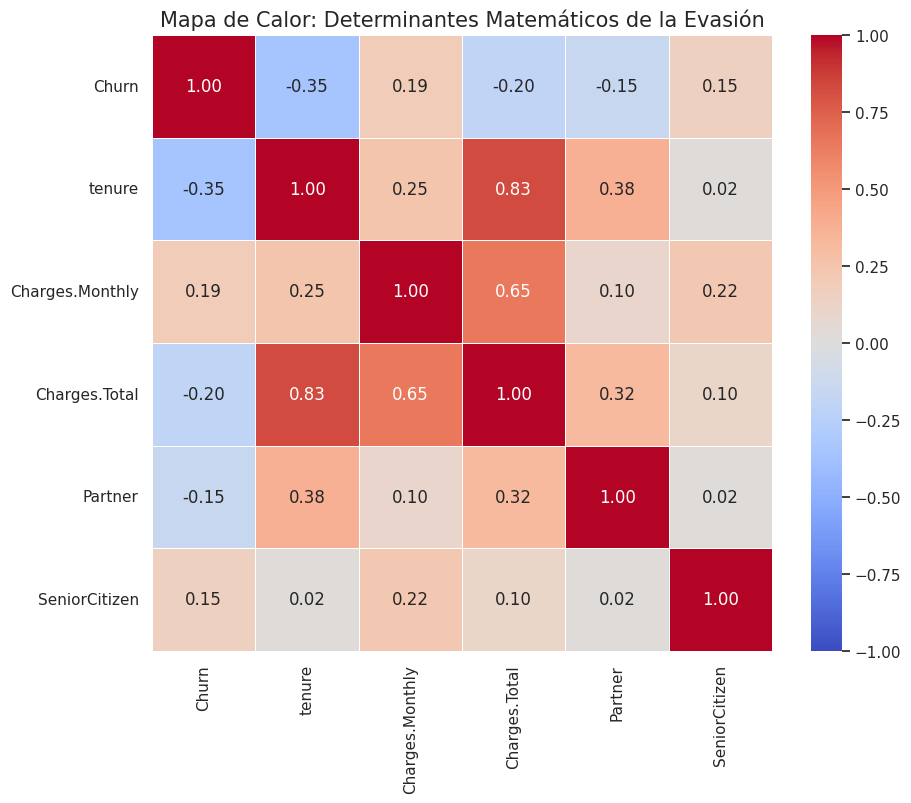

In [ ]:
cols_analisis = ['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Partner', 'SeniorCitizen']
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df[cols_analisis].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor: Determinantes Matemáticos de la Evasión', fontsize=15)
plt.show()

## 4. Conclusiones y Recomendaciones Estratégicas

### Síntesis del Perfil de Riesgo
Tras la triangulación de datos estadísticos y visuales, hemos construido el **"Perfil del Cliente en Riesgo"**. Un cliente tiene una probabilidad de fuga superior al 70% si cumple con estas tres condiciones simultáneas:
1.  Es un cliente nuevo (**Antigüedad < 6 meses**).
2.  Tiene un contrato flexible (**Mes a Mes**).
3.  Utiliza un medio de pago manual o con fricción (**Cheque Electrónico**).

### Plan de Acción Recomendado (Roadmap)

Para revertir la tendencia actual y reducir la tasa de evasión por debajo del 20%, proponemos a la gerencia las siguientes iniciativas tácticas:

#### 🚀 1. Estrategia de "Blindaje Contractual"
* **Acción:** Implementar una campaña agresiva de migración dirigida exclusivamente a clientes "Mes a Mes" con antigüedad entre 3 y 9 meses.
* **Táctica:** Ofrecer un incentivo tangible (ej. "Descuento del 15% permanente" o "Upgrade de velocidad gratuito") a cambio de firmar un contrato de permanencia de 1 año.
* **Impacto Esperado:** Reducción drástica de la volatilidad en la base de clientes.

#### 🛡️ 2. Programa de Onboarding "Primeros 180 Días"
* **Acción:** Crear un protocolo de atención diferenciado para clientes nuevos. Dado que la correlación `Tenure` vs `Churn` es negativa (-0.35), la supervivencia del cliente se decide en el primer semestre.
* **Táctica:** Llamadas de bienvenida, monitoreo proactivo de calidad de servicio y soporte técnico prioritario durante los primeros 6 meses.

#### 💳 3. Digitalización y Automatización de Pagos
* **Acción:** Desincentivar el uso de "Electronic check" y promover el "Paperless Billing" con tarjeta de crédito.
* **Táctica:** Bonificar con puntos de fidelidad o pequeños descuentos en factura a los usuarios que inscriban su tarjeta de crédito para el débito automático. Esto elimina la fricción mensual del pago manual y reduce la cancelación involuntaria por olvido o error.

---